# Examen Módulo 1 - Optimización.
# Bruno Fuentes Navarro    Expediente : IC-709236

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Volumen máximo**. Considere un cono circular recto inscrito en una esfera de radio $r$:

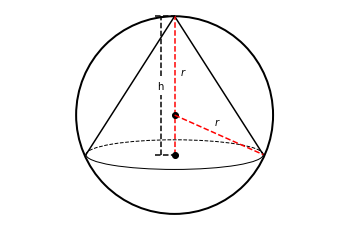

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (14 puntos)
2. Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$. (10 puntos)
3. ¿Cuál es el volumen máximo del cono? (10 puntos)

# Procedimiento(Solución)-PRIMER PUNTO
### Primero definimos la funcion del volúmen, la cual es :

$$V = \frac{1}{3}\pi r^2h$$

- A partir del corte transversal de la figura y el teorema de la altura me base para la resolverlo
- Ademas se considero el radio como $r = 2$,por lo que el diametro $d=4$

### Se forma un triángulo rectángulo que a su vez se divide y da origen a 2 triángulos rectángulos.

### La altura($h$) del triángulo cuadrado se define como: la altura($h^2$) al cuadrado la que es igual al producto de sus proyecciones en el plano, lo cual se definiria como:

 $$d^2 = h(4-h)$$
 $$d^2 = 4h-h^2$$
 $$d = \sqrt(4h-h^2)$$
##### Despejamos el diametro.

- La altura obtenida es representativa del radio de la base del cono, por lo que:

$$r = \sqrt(4h-h^2)$$

- Sustituimos la raíz anterior en la función del volumen, y llegamos a:

$$V = \frac{1}{3} \pi (\sqrt(4h-h^2))^2h$$

- Desarrollamos la funcion eliminando el cuadrado y el radical mediante el uso del álgebra

$$V = \frac{1}{3} \pi (4h-h^2)h$$

- Se aplica la ley distrubutiva y llegamos a:

$$V = \frac{1}{3} \pi (4h^2-h^3)$$

- ### Al final definimos a la funcion a maximizar, la cual es:

$$max V = \frac{1}{3} \pi (4h^2-h^3)$$

In [12]:
# Se importan las libererias que se ocupan
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [13]:
#Definimos la funcion del volumen
sym.var('h')
def V(h):
    return (sym.pi*(4*h**2-h**3))/3
V(h)

pi*(-h**3 + 4*h**2)/3

In [14]:
# Realizamos la derivada en funcion de h y obtenemos los puntos críticos
dV=sym.diff(V(h),h)
pc=sym.solve(dV,h)
pc

[0, 8/3]

In [15]:
# Obtenemos la segunda derivada de la funcion 'V(h)'
ddV=sym.diff(dV,h)
ddV

pi*(8 - 6*h)/3

In [16]:
# Evaluamos la segunda derivada en el punto critico(pc[1])
ddV.subs(h,pc[1])

-8*pi/3

Ya que el resultado de la evaluacion fue  $<0$ se trata de un máximo relativo.

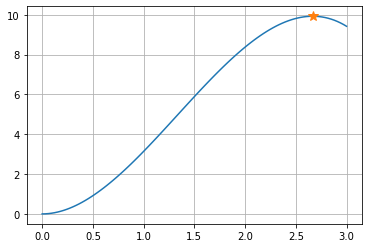

In [20]:
# Gráficamos la función de (0,3)
xn=np.linspace(0,3,100)
y=V(xn)
plt.plot(xn,y)
plt.plot(pc[1],V(pc[1]),'*',ms=10)
plt.grid()

In [21]:
#El punto critico(pc)
pc[1]

8/3

In [22]:
#Evaluamos la funcion V(h) en pc[1], y obtenemos lo siguiente:
V(pc[1])

256*pi/81

- Por lo tanto deducimos que el volumen maximo del cono es:

$ 256\pi / 81 $

- La altura para obtener dicho maximo es la siguiente:

$8/3$

---
# Segundo punto. Programación lineal (34 puntos)

Una compañia de aceros produce dos tamaños de tubos: A, B que son vendidos, respectivamente en 10u.m. y 9u.m. por metro. Para fabricar cada metro del tubo A se requieren 0.5 minutos de tiempo de procesamiento sobre un tipo particular de maquina de modelado y cada metro del tubo B requiere 0.6 minutos. Después de la producción, cada metro de tubo, sin importar el tipo requiere 1 onza de material de soldar. El costo total se estima en 3u.m. y 4u.m. por metro de los tubos respectivamente. Para la siguiente semana, la compañía ha recibido pedidos excepcionalmente grandes que totalizan 2000 metros del tubo A y 5000 metros del tubo B. como solo se dispone de 30 horas de tiempo de maquina esta semana y solo se tienen en inventario 3500 onzas de material de soldar, el departamento de producción no podrá satisfacer esta demanda. Como no se espera que continúe esta demanda tan alta, la gerencia esta considerando la compra de algunos de estos tubos a proveedores de Japón a un costo de entrega de 6u.m. por metro del tubo A y 7u.m. por metro del tubo B.

Se desea conocer la cantidad de producción de cada tipo de tubo y la cantidad de compra a Japón para satisfacer la demanda y **maximizar** las ganancias de la compañía (esto es, precio de venta menos costos). La siguiente tabla presenta la información correspondiente.

<table>
  <tr>
      <th>Tubo</th>
      <th>Precio de venta</th>
      <th>Demanda</th>
      <th>Tiempo de máquina</th>
      <th>Material para soldar</th>
      <th>Costo de producción</th>
      <th>Costo de compra</th>
  </tr>
  <tr>
      <th>Tipo A</th>
      <td>10</td>
      <td>2000</td>
      <td>0.5 min</td>
      <td>1 oz/m</td>
      <td>3</td>
      <td>6</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Tipo B</th>
      <td>9</td>
      <td>5000</td>
      <td>0.6 min</td>
      <td>1 oz/m</td>
      <td>4</td>
      <td>7</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td></td>
      <td></td>
      <td>30 horas</td>
      <td>3500 oz</td>
      <td></td>
      <td></td>
  </tr>
</table>

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(24 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos tubos de cada tipo se deben producir?, ¿Cuántos se deben comprar?, ¿Cuál es la ganancia? (10 puntos)


### **Primeramente definimos las variables para discretizar el problema**

+ $x_a$ = Metros del tubo A que se deben producir

+ $y_a$ = Metros del tubo A que se deben comprar

+ $x_b$ = Metros del tubo B que se deben producir

+ $y_b$ = Metros del tubo B que se deben comprar

### **Establecemos las condiciones de frontera(Restricciones)**

+ $0.5x_a + 0.6x_b\leq1800$ (Tiempo con el que se dispone en minutos)

+ $x_a + x_b \leq3500$ (Material para soldar con el que se cuenta)

+ $x_a + y_a = 2000$ (Metros requeridos del tubo A)

+ $x_b + y_b = 5000$ (Metros requeridos del tubo B)

### **Establecemos la funcion que queremos maximizar**

+ #### **Buscamos maximizar la ganancia en funcion de los tubos que se producen y los comprados, a manera que el precio de venta se le sustrae el costo**

$max 7x_a+5x_b+4y_a+2y_b$

#### **Establecemos la funcion a minimizar ya que igual es requerida**

+ Se busca minimizar el costo de compra en Japón

$min 6y_a+7y_b$

In [83]:
#Importamos las librerias que se ocupan
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as opt

In [26]:
# Coeficientes de función objetivo
c=-np.array([7,5,4,2]) 

Aub=np.array([[0.5,0,0.6,0],                # Restrcciónes de tiempo disponible de maquina             
              [1,0,1,0]])                   # Restricciónes de material para soldar
# Coeficientes de los límites de las restricciones
bub=np.array([1800,3500])                  
# Coeficientes de igualdad
Aeq=([[1,1,0,0],[0,0,1,1]]) 
#coeficiente de igualdad
beq=([2000,5000]) 
#Usamos opt.linprog con el metodo 'simplex'
opt.linprog(c,Aub,bub,Aeq,beq,method='simplex')

     con: array([0., 0.])
     fun: -26666.666666666664
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([  0.        , 166.66666667])
  status: 0
 success: True
       x: array([2000.        ,    0.        , 1333.33333333, 3666.66666667])

### **Obtuvimos un beneficio neto de  $26,666.67 u.m$ mediante la siguiente estrategia:**

+ Se deberan producir Producir $2000$ metros del **'tubo A'**

+ No se deberá comprar ningun metro **'tubo A'** a Japón

+ Se deberá producir $1333$ metros del **'tubo B'**

+ Se deberá comprar $3667$ metros del **'tubo B'** a Japón

Siguiento esto optimizaríamos la producción en la compañia.

---
# Tercer punto. Ajuste de curvas (32 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en cientos de miles entre los años 1988 y 2001.

In [221]:
y = np.array([5.946,6.430,7.255,8.804,9.725,9.187,8.453,8.581,
              10.421,13.170,14.295,13.920,12.770,13.866])
x = np.arange(8,22)

1. Ajuste las bancarrotas con polinomios de grado 1, 3 y 5. Muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (22 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predecirlo para el año 2011. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

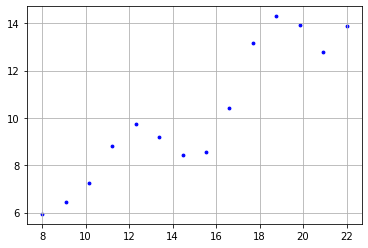

In [222]:
#Graficamos los arreglos de datos inicialmente
x=np.linspace(8,22,14)
y=y
plt.scatter(x,y,c='b',s=8)
plt.grid()

In [223]:
# Se define la funcion para poder establecer los polinomios grados n+1 y usamos numpy.dot() para el producto punto.
def f(beta,x,n):
    X=[x**i for i in range(n+1)]
    return np.dot(beta,X)

In [224]:
# Se utiliza el criterio de minimos cuadrados
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [225]:
# Definimos el polinomio de grado 1
n=1
beta0=np.random.rand(n+1)
sol1=opt.minimize(fun,beta0,args=(x,y,n))

# Definimos el polinomio de grado 3
n=3
beta0=np.random.rand(n+1)
sol3=opt.minimize(fun,beta0,args=(x,y,n))

# Definimos el polinomio de grado 5
n=5
beta0=np.random.rand(n+1)
sol5=opt.minimize(fun,beta0,args=(x,y,n))


In [226]:
# Desplegamos la primer solucion con polinomio grado 1
sol1

      fun: 15.56747628132118
 hess_inv: array([[ 0.46209937, -0.02842567],
       [-0.02842567,  0.00189504]])
      jac: array([3.57627869e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([1.25745044, 0.59627949])

In [227]:
# Desplegamos la segunda solucion con polinomio grado 3
sol3

      fun: 15.20126980335591
 hess_inv: array([[ 9.06043682e-03, -6.87825291e-06,  6.25052917e-04,
        -3.92967284e-05],
       [-6.87825291e-06,  9.91080400e-09, -4.81475965e-07,
         2.89845165e-08],
       [ 6.25052917e-04, -4.81475965e-07,  4.31310827e-05,
        -2.70996055e-06],
       [-3.92967284e-05,  2.89845165e-08, -2.70996055e-06,
         1.71517160e-07]])
      jac: array([ 1.19209290e-07, -7.15255737e-07,  1.54972076e-06,  1.16586685e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 145
      nit: 19
     njev: 29
   status: 2
  success: False
        x: array([ 8.83689323e+00, -1.09661341e+00,  1.18721927e-01, -2.63692438e-03])

In [228]:
# Desplegamos la tercera solucion con polinomio grado 5
sol5

      fun: 773.4573708906192
 hess_inv: array([[ 9.99991382e-01, -7.43341429e-05, -5.56238447e-04,
        -2.86908395e-03,  2.67104129e-04, -6.38333094e-06],
       [-7.43341429e-05,  9.99358754e-01, -4.79939863e-03,
        -2.47710676e-02,  2.05272388e-03, -4.61058605e-05],
       [-5.56238447e-04, -4.79939863e-03,  9.64063779e-01,
        -1.85716597e-01,  1.14775071e-02, -2.29118405e-04],
       [-2.86908395e-03, -2.47710676e-02, -1.85716597e-01,
         3.64477819e-02, -2.26629499e-03,  4.53771653e-05],
       [ 2.67104129e-04,  2.05272388e-03,  1.14775071e-02,
        -2.26629499e-03,  1.41196763e-04, -2.82991751e-06],
       [-6.38333094e-06, -4.61058605e-05, -2.29118405e-04,
         4.53771653e-05, -2.82991751e-06,  5.67462682e-08]])
      jac: array([1.17091614e+02, 1.54009936e+03, 1.98377119e+04, 2.35231602e+05,
       2.16375810e+06, 1.75758689e+06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 3
     njev: 56
   sta

In [229]:
# Agreagamos las diferentes soluciones en el vector sol[n] y creamos sol[i]
sol=[0,0,0,0,0] 
for i in range(5):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

In [230]:
sol[0].fun,sol[2].fun,sol[4].fun

(15.567476281318807, 15.201269804172341, 19.839065229326373)

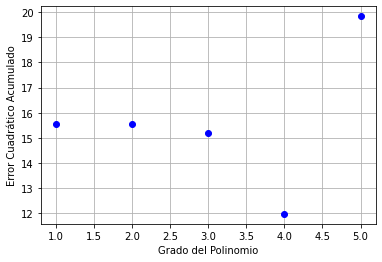

In [231]:
# Graficamos el error cuadrático acumulado de 1 a 5

for i in range(5):
    plt.plot(i+1,sol[i].fun,'ob')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Acumulado')
plt.grid()

In [232]:
# Agreamos a un vector solucion las soluciones de 1 a 5
for i in range(5):
    print(sol[i].x)

[1.25744908 0.59627958]
[1.26988924e+00 5.94469374e-01 6.03372732e-05]
[ 8.83689381e+00 -1.09661354e+00  1.18721935e-01 -2.63692454e-03]
[-1.46487563e+02  4.55777496e+01 -4.91707744e+00  2.29362265e-01
 -3.86665425e-03]
[ 9.10303537e-01  1.11671663e-01  3.35766470e-01 -5.75981258e-02
  3.61492184e-03 -7.51380355e-05]


### **Podemos deducir que el polinomio grado 3 es el que tiene menor error en el ajuste.**

---
### Gráficamos los 3 Polinomios 

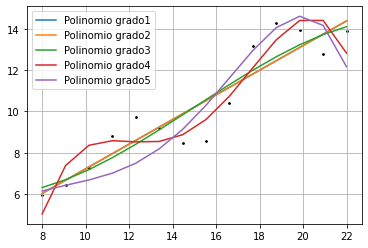

In [233]:
# Gráfica de los polinomios
plt.scatter(x,y,s=3,c='k')
for i in range(5):
    plt.plot(x,f(sol[i].x,x,i+1),label='Polinomio grado'+str(i+1))
plt.legend(loc='best')
plt.grid()

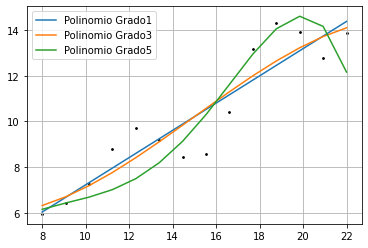

In [234]:
# Graficamos los polinomios grado 1,3 y 5.
plt.scatter(x,y,s=3,c='k')
plt.plot(x,f(sol[0].x,x,1),label='Polinomio Grado'+str(1))
plt.plot(x,f(sol[2].x,x,3),label='Polinomio Grado'+str(3))
plt.plot(x,f(sol[4].x,x,5),label='Polinomio Grado'+str(5))
plt.legend(loc='best')
plt.grid()

# Vemos que la Grafica del polinomio grado 3 es la de mejor ajuste

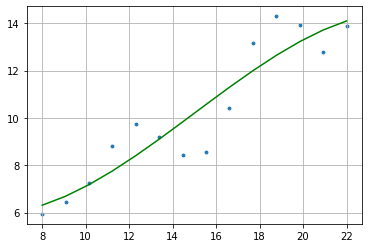

In [238]:
# Graficamos el polinomio grado 3
plt.scatter(x,y,s=8)
f= sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f,'g')
plt.grid()

--- 
## Buscamos el numero de bancarrotas a mediados de 1998(1998.5) y para 2011

In [235]:
a=1998.5-1988
for i in range(5):
    print(f(sol[i].x,a,i+1))

7.518384669826894
7.518469849522162
7.35897526007685
8.487087788469807
6.773950925167512


##### Si usamos este modelo para estimar las bancarrotas a mediados de 1998 con polinomios grado(1-5) y utilizando solo polinomios de grado 1,3 y 5(en base al polinomio grado 3 este nos muestra que hay 7.3589... bancarrotas) 

In [236]:
a=2011-1988
for i in range(5):
    print(f(sol[i].x,a,i+1))

14.971879417388868
14.974603257466155
14.33522526683769
9.268994392070454
8.291992674121275


##### Si comparamos las bancarrotas de 1998 con el valor de 14.29 y las de 1999 con 13.920 vemos un gran cesgo o diferencia


##### Si usamos el modelo para predecir bancarrotas en 2011 con polinomios (1-5) y utilizando solo los polinomios 1,3 y 5. El polinomio 3 es el de menos error por lo que usamos ese y nos predice 14.33 bancarrotas

---
¿Qué diferencias encuentro en cuanto a la interpolación y la extrapolación?

##### En la interpolacion se da un valor en un rango de valores ya conocidos, en la extrapolacion se da un valor fuera de ese rango conocido
